In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
city_day = pd.read_csv('city_day.csv')

In [3]:
city_day.head(3)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN


In [4]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


# <a> Missing Values </a>

In [5]:
def missing_value_table(df):
    values = df.isnull().sum()
    percentage = 100*df.isnull().sum()/len(df)
    table = pd.concat([values,percentage.round(2)],axis=1)
    table.columns = ['Missing values','% of Total values']
    return table[table['Missing values']!=0].sort_values('% of Total values',ascending=False).style.background_gradient('Reds')
    
missing_value_table(city_day)

,Missing values,% of Total values
Xylene,18109,61.320000
PM10,11140,37.720000
NH3,10328,34.970000
Toluene,8041,27.230000
Benzene,5623,19.040000
AQI,4681,15.850000
AQI_Bucket,4681,15.850000
PM2.5,4598,15.570000
NOx,4185,14.170000
O3,4022,13.620000


> ** There are a lot of null values in some columns eg.Xylene. There could be a few reasons for the missing data:
> * Issue in the meter reading.
> * Station is not designed for recording all the pollutants.

In [6]:
# converting dates into datetime objects and setting Date as index
city_day['Date'] = pd.to_datetime(city_day['Date'])
city_day.set_index('Date', inplace=True)

In [7]:
city_day.head(3)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN


For city: Ahmedabad


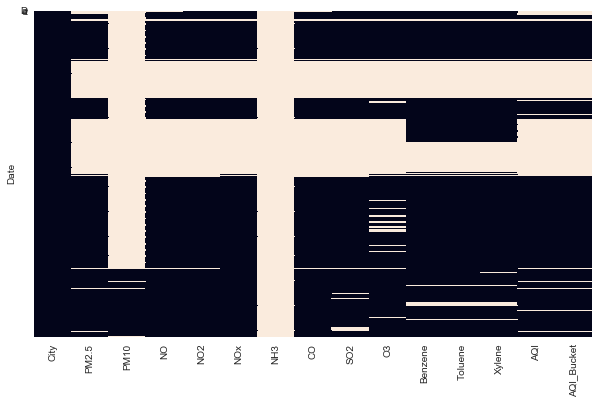

For city: Aizawl


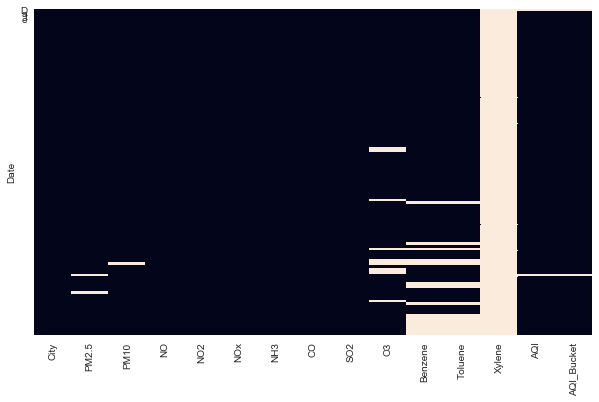

For city: Amaravati


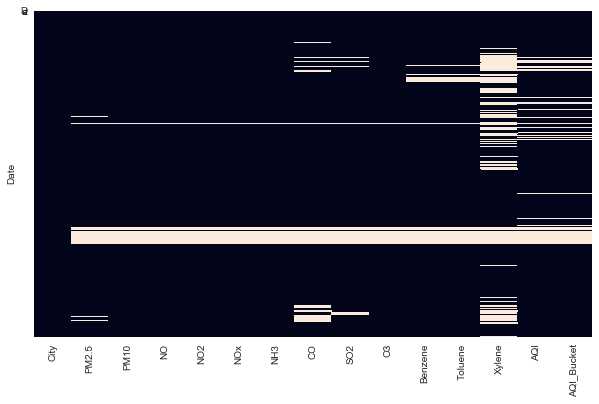

For city: Amritsar


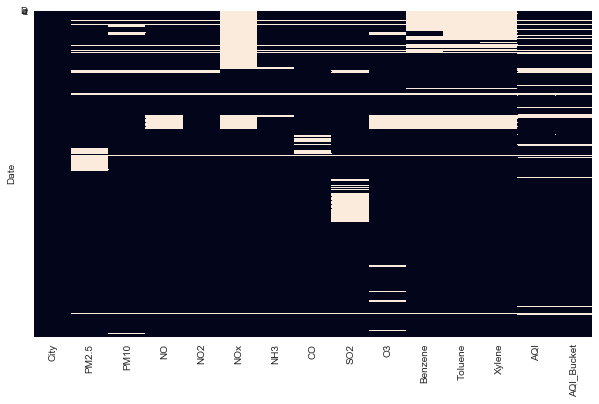

For city: Bengaluru


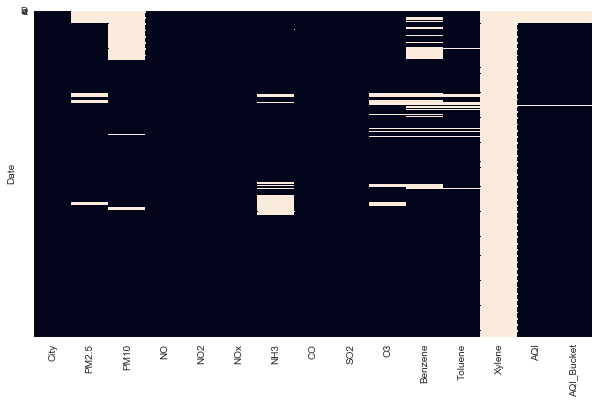

For city: Bhopal


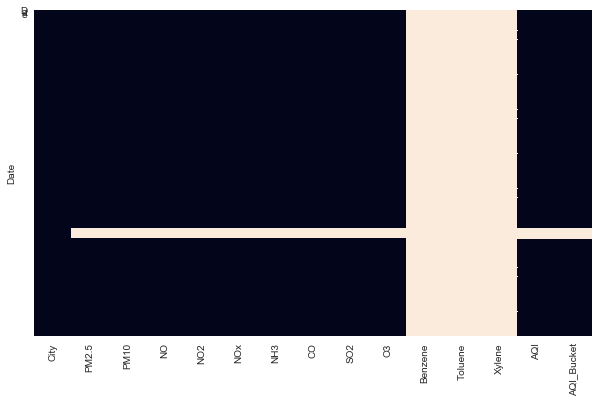

For city: Brajrajnagar


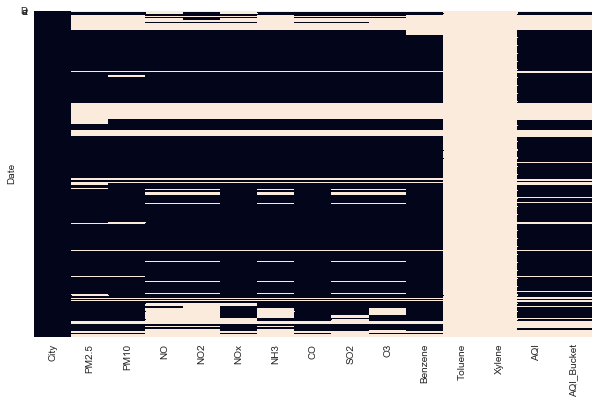

For city: Chandigarh


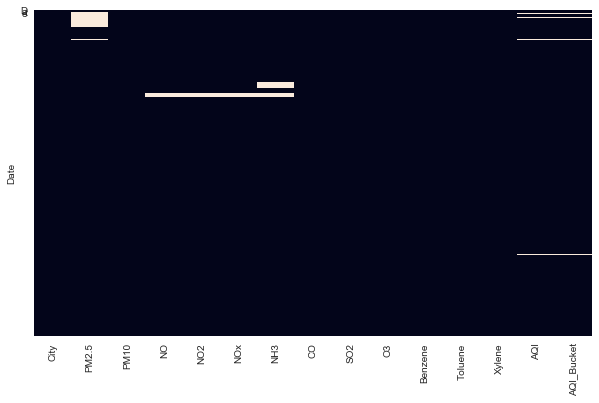

For city: Chennai


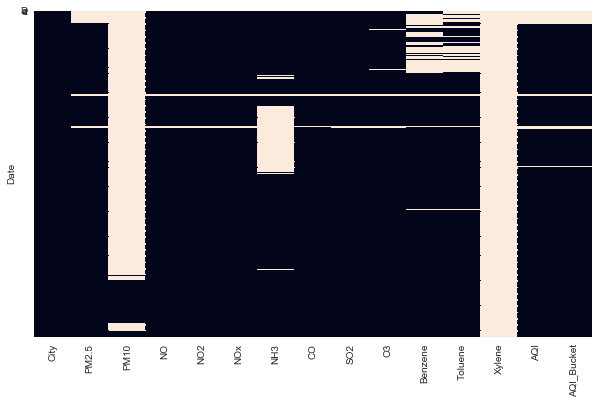

For city: Coimbatore


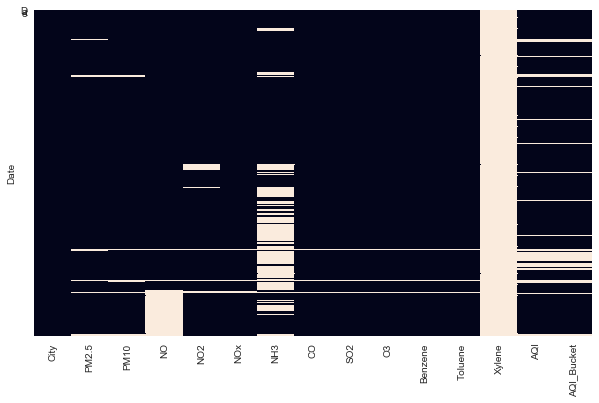

For city: Delhi


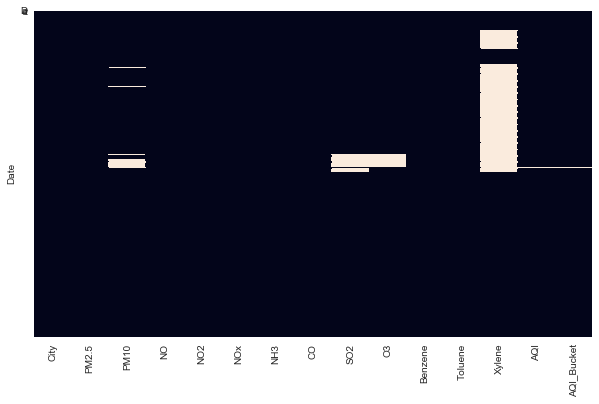

For city: Ernakulam


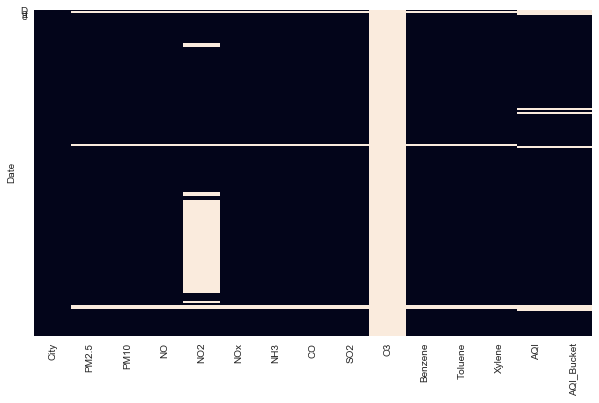

For city: Gurugram


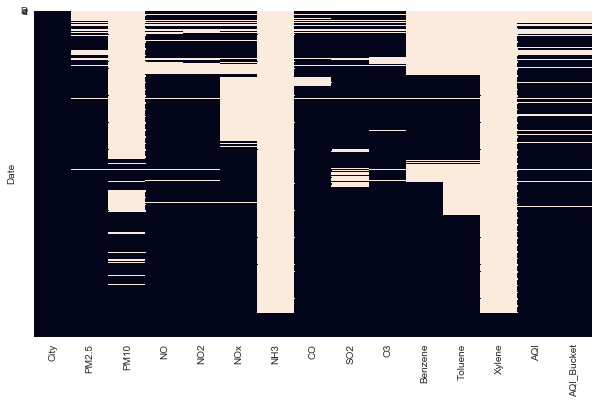

For city: Guwahati


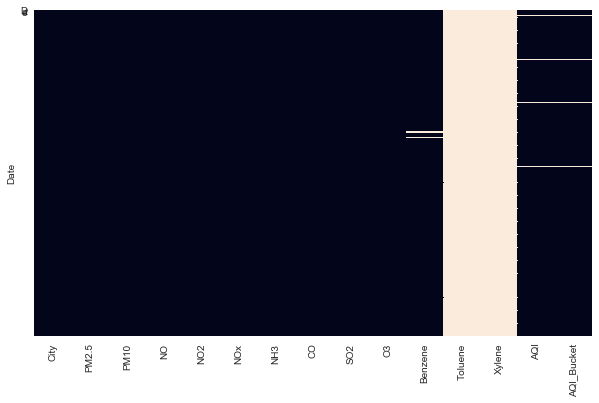

For city: Hyderabad


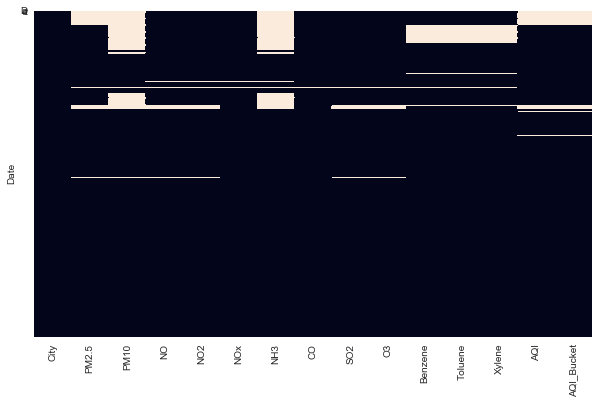

For city: Jaipur


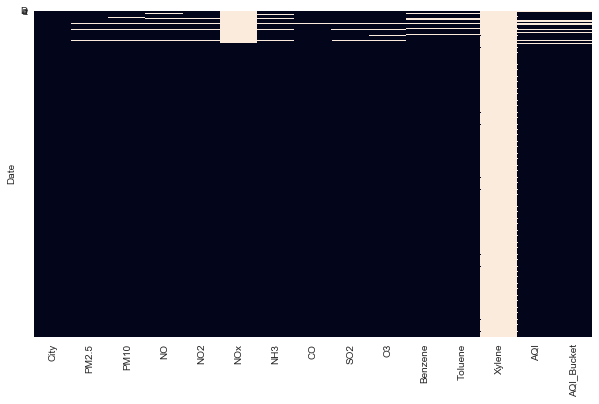

For city: Jorapokhar


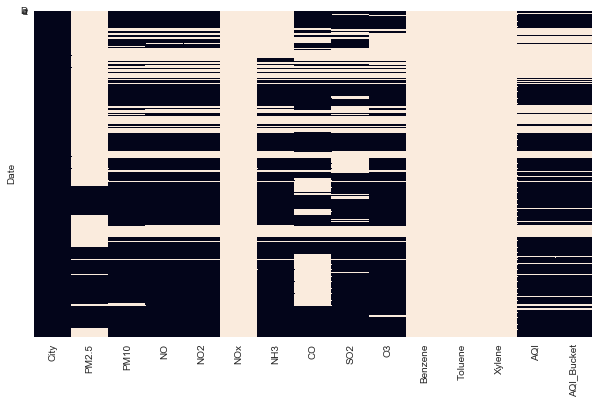

For city: Kochi


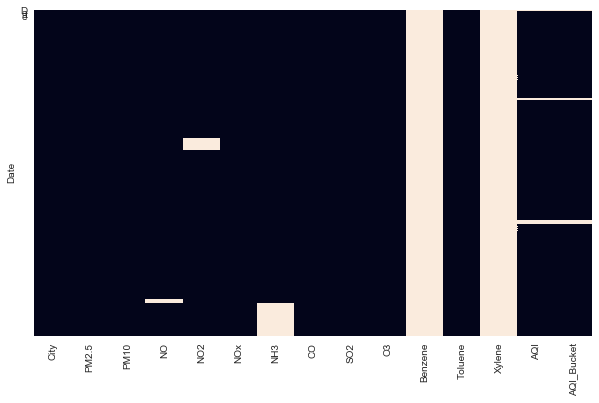

For city: Kolkata


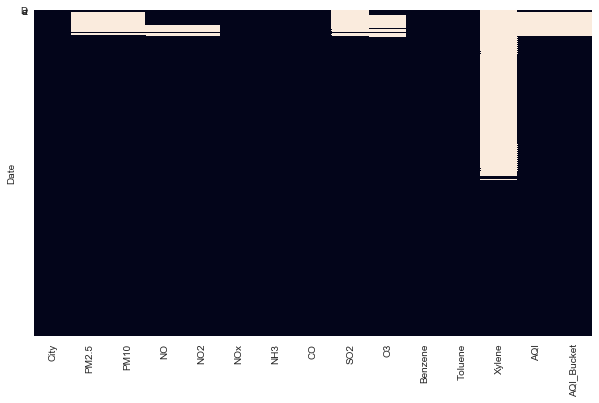

For city: Lucknow


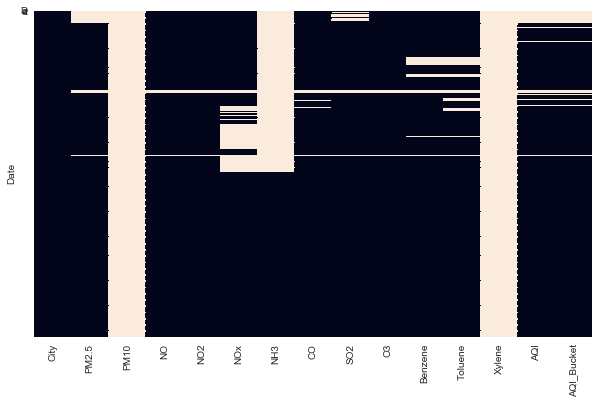

For city: Mumbai


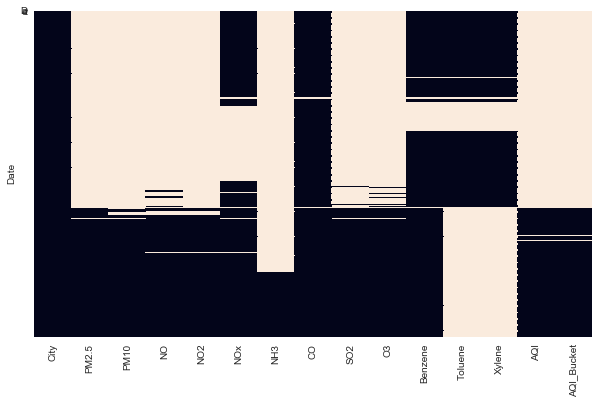

For city: Patna


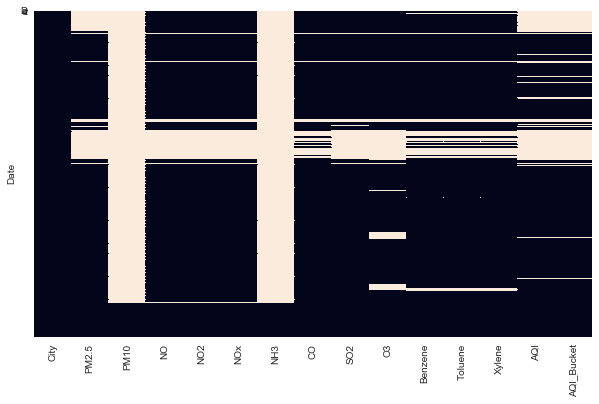

For city: Shillong


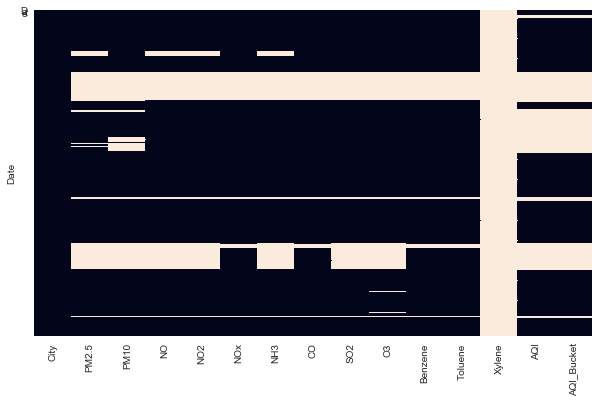

For city: Talcher


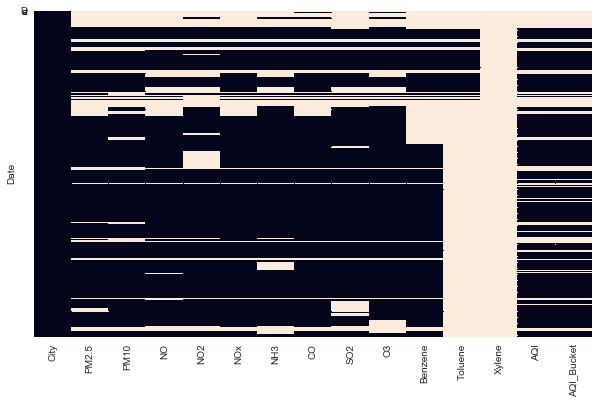

For city: Thiruvananthapuram


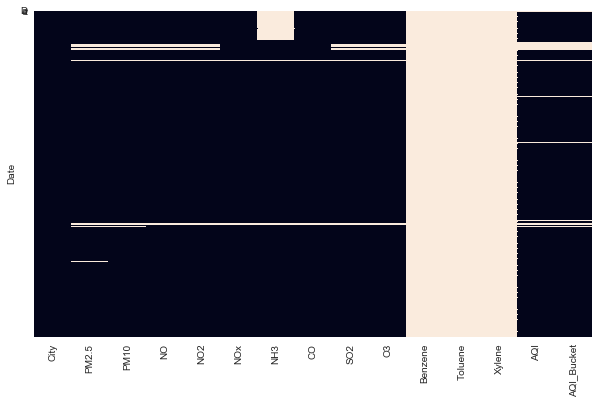

For city: Visakhapatnam


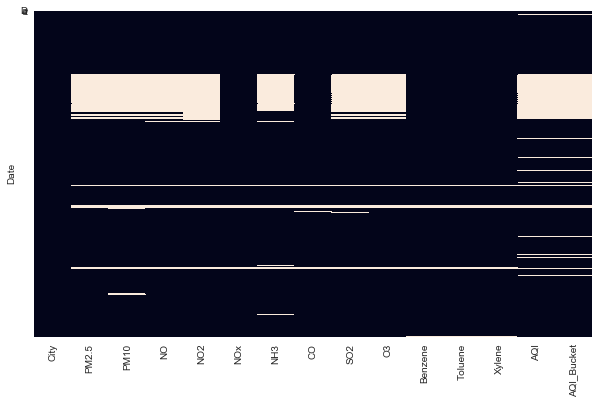

In [8]:
# showing missing values for each city

cities = city_day['City'].unique()
for city in cities:
    plt.figure(figsize=(10,6))
    sns.heatmap(city_day[city_day['City'] == city].isnull(), cbar=False, yticklabels='Date')
    print('For city:', city)
    plt.show()
    print('='*80)

#### From the above plots we can see that some cities like Thiruvanathapuran, Jorapokhar have very few or no values in Benzene, Toluene and Xylene columns
#### We will discard these columns and will try to fill with other columns with Linear Interpolation methods

In [9]:
# Taking only major air pollutants into consideration [PM2.5, PM10, N02, NH3, S02, 03, AQI]
df_city_day = city_day[['City', 'PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'AQI']]

## Handling the missing data

In [10]:
# Filling the Missing values using Linear Interpolation method
df_city_day.interpolate(limit_direction='both', inplace=True)


# <a> Visualising data </a>

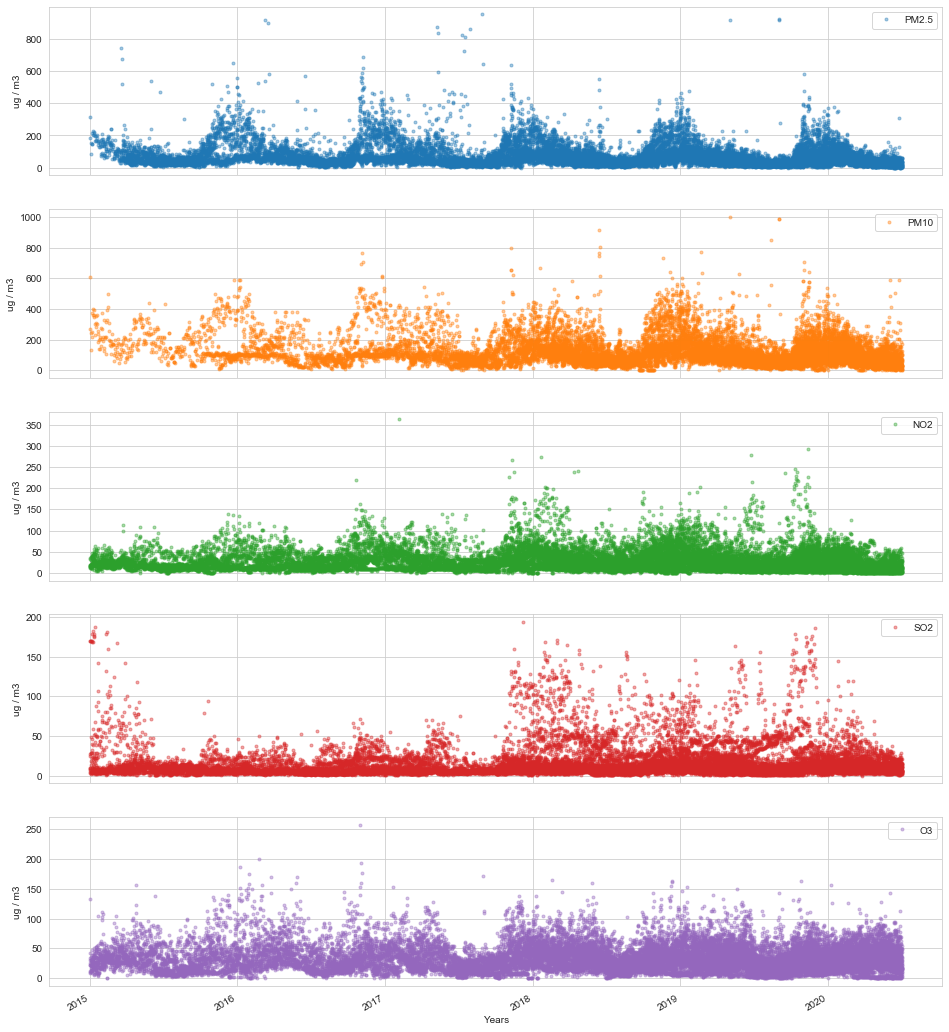

In [11]:
pollutants = ['PM2.5','PM10','NO2', 'SO2','O3']
axes = city_day[pollutants].plot(marker='.', alpha=0.4, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

> * PM2.5 and PM10 pollution show a seasonal effect, with pollution being higher in winter months as compared to the summer ones.
> * SO2 level has started increasing after 2017, although it had also seen a sudden rise in 2015 also.
> * O3 does not depend on weather or seasonal conditions.

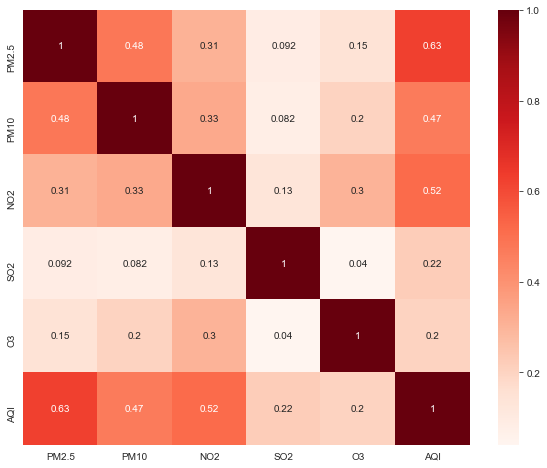

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df_city_day.corr(), cmap='Reds', annot=True)

> * Particulate Matter (PM2.5 and PM10) and NO2 are highly correlated with AQI 

### <a>Most Polluted Cities based on Average AQI</a>

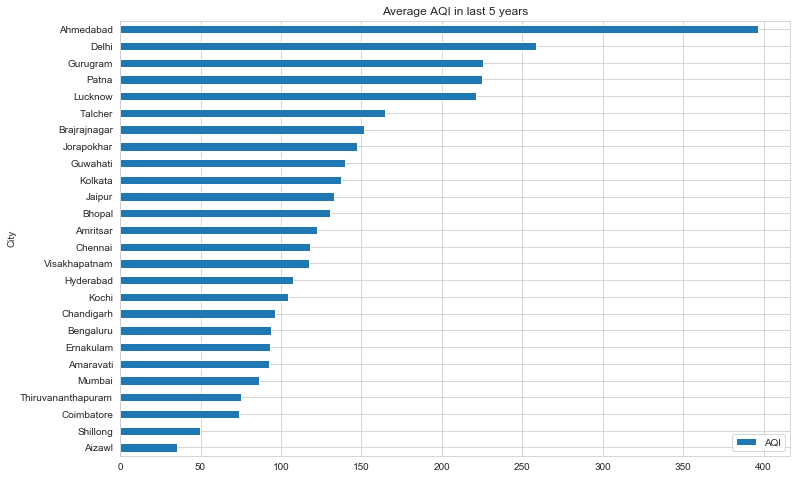

In [13]:
df_city_day[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='barh',figsize=(12,8))
plt.title('Average AQI in last 5 years');

> Ahmedabad's air quality is worst. Delhi, Gurugram, Patna and Lucknow also have an alarming AQI.

## <a>Year and Month wise distribution</a>

In [14]:
def trend_plot(df,value, city=None):
    if city:
        df = df[df['City']== city]
    df['year'] = [d.year for d in df.index]
    df['month'] = [d.month for d in df.index]
    fig, axes = plt.subplots(1, 2, figsize=(12,6), dpi= 80)
    sns.pointplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df, ax=axes[1])

    # Set Title
    axes[0].set_title(f'{value}\n Year-wise  Plot \n(The Trend)', fontsize=12); 
    axes[1].set_title(f'{value}\n Month-wise Plot \n(The Seasonality)', fontsize=12)
    plt.show()

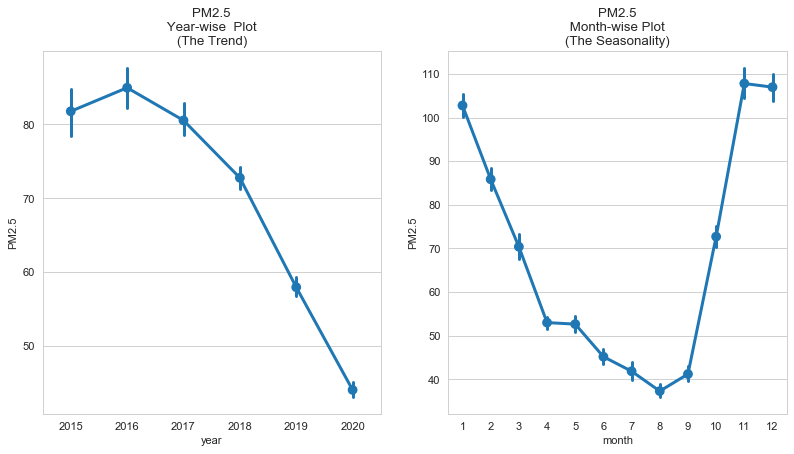

In [15]:
trend_plot(df_city_day, 'PM2.5')

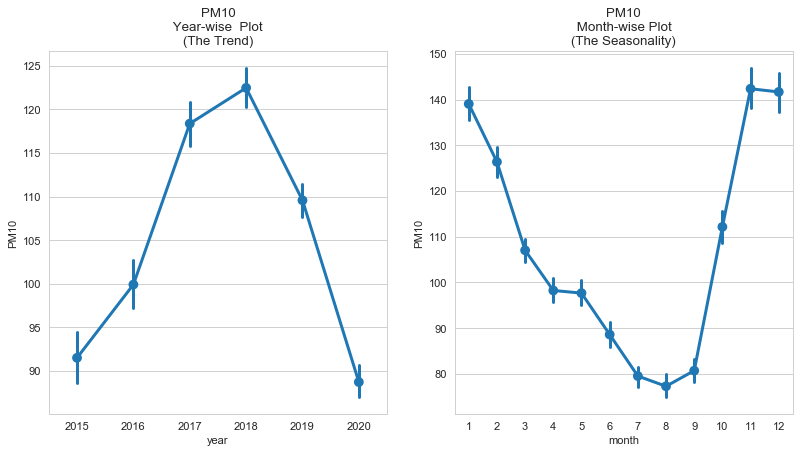

In [16]:
trend_plot(df_city_day, 'PM10')

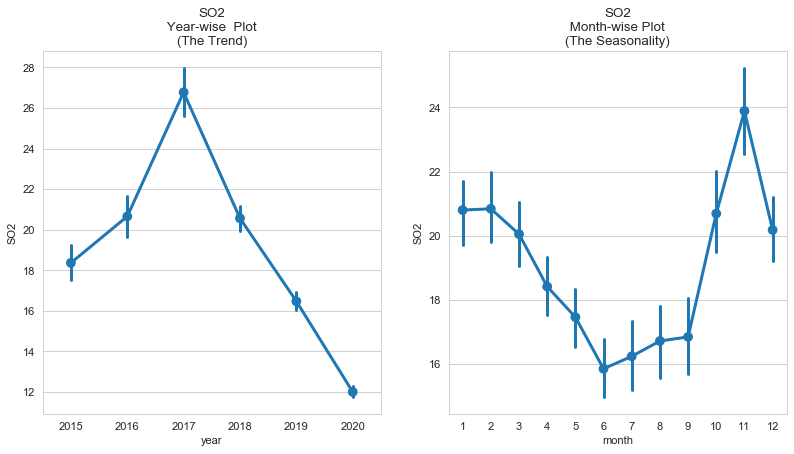

In [17]:
trend_plot(df_city_day, 'SO2')

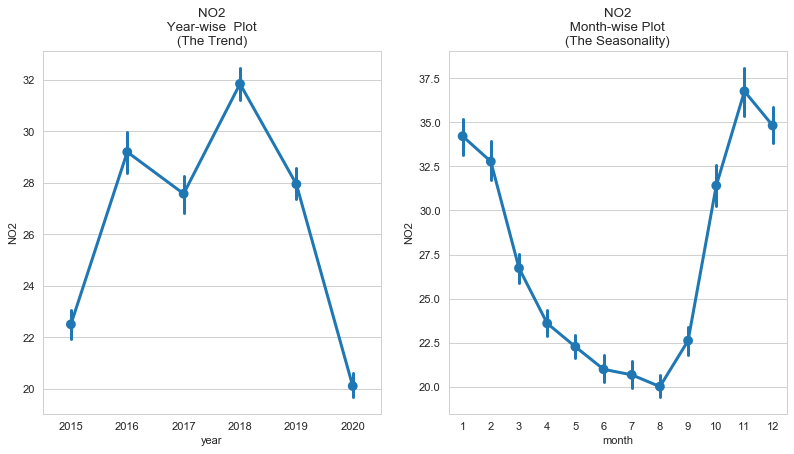

In [18]:
trend_plot(df_city_day, 'NO2')

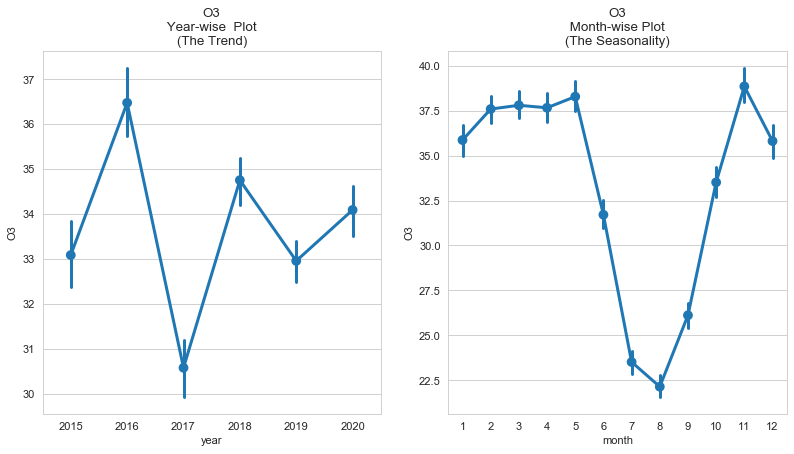

In [19]:
trend_plot(df_city_day, 'O3')

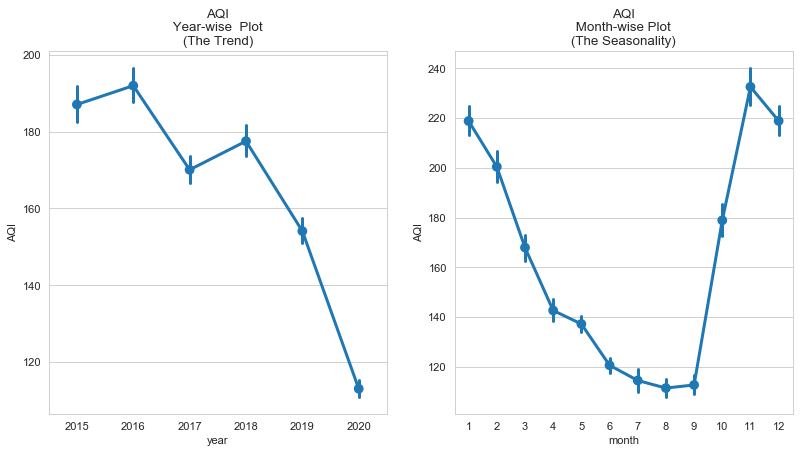

In [20]:
trend_plot(df_city_day, 'AQI')

#### From the above plots, we can see:

> * There is a clear trend that pollution level in India falls in months of July and August. The Particulate Matter(PM2.5 and PM10) levels starts to decline from May.

> * The Pollution level then from August starts to rise and reach the highest leves in winter months. This can be explained by many factors like stubble burning in north India, extreme low temperature and wind speeds which adds with the ongoing auto-sector and industrial sector pollution. This creates harmful level of pollution in winter season.


### <a>Most Polluted Indian Cities (with different Pollutants)</a>

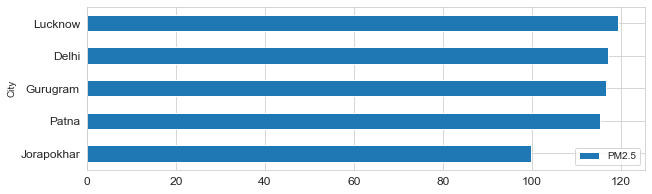

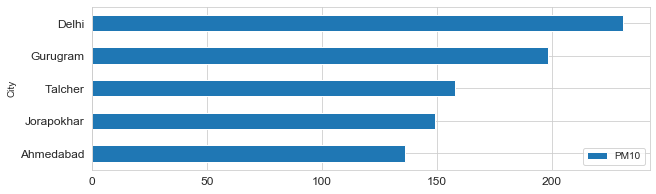

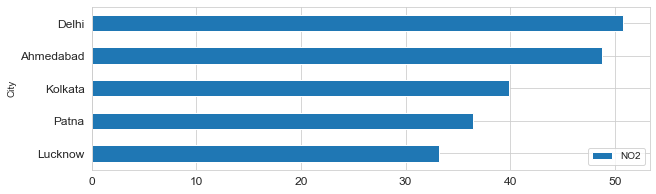

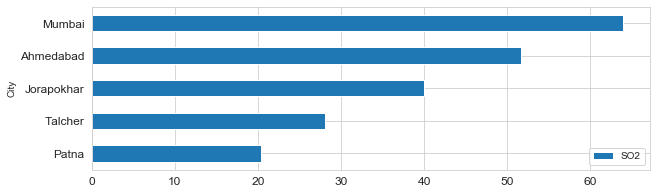

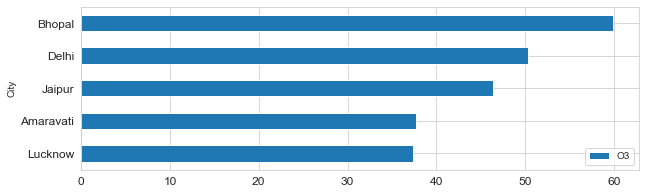

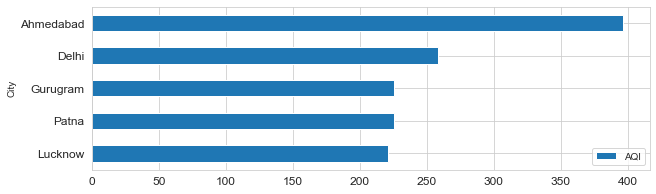

In [21]:

def most_polluted_cities(pollutant):
    t = df_city_day[[pollutant, 'City']].groupby('City').mean().sort_values(by=pollutant, ascending=False)
    return t[:5]
for pollutant in pollutants + ['AQI']:
    df = most_polluted_cities(pollutant)
    df.sort_values(by=pollutant, ascending=True).plot(kind='barh', fontsize=12, figsize=(10,3))

> We can see that Ahmedabad, Delhi, Gurugram, Patna and Lucknow are the most polluted cities as shown by their AQI levels

# <a>Effect of Lockdown on AQI</a>

In [22]:
df_city_day.reset_index(inplace=True)

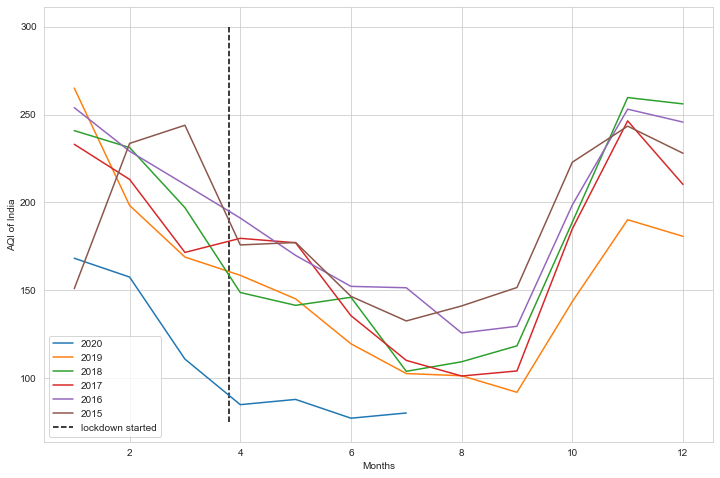

In [23]:
plt.figure(figsize=(12,8))
plt.xlabel('Months')
plt.ylabel('AQI of India')
plt.plot(df_city_day[df_city_day['Date'].dt.year==2020].groupby(df_city_day['Date'].dt.month)['AQI'].mean(),label='2020')
plt.plot(df_city_day[df_city_day['Date'].dt.year==2019].groupby(df_city_day['Date'].dt.month)['AQI'].mean(),label='2019')
plt.plot(df_city_day[df_city_day['Date'].dt.year==2018].groupby(df_city_day['Date'].dt.month)['AQI'].mean(),label='2018')
plt.plot(df_city_day[df_city_day['Date'].dt.year==2017].groupby(df_city_day['Date'].dt.month)['AQI'].mean(),label='2017')
plt.plot(df_city_day[df_city_day['Date'].dt.year==2016].groupby(df_city_day['Date'].dt.month)['AQI'].mean(),label='2016')
plt.plot(df_city_day[df_city_day['Date'].dt.year==2015].groupby(df_city_day['Date'].dt.month)['AQI'].mean(),label='2015')
plt.vlines(3.8, 75, 300, linestyle='dashed', label='lockdown started')

plt.legend()
plt.show()

### <a>Effect of Lockdown on different cities</a>

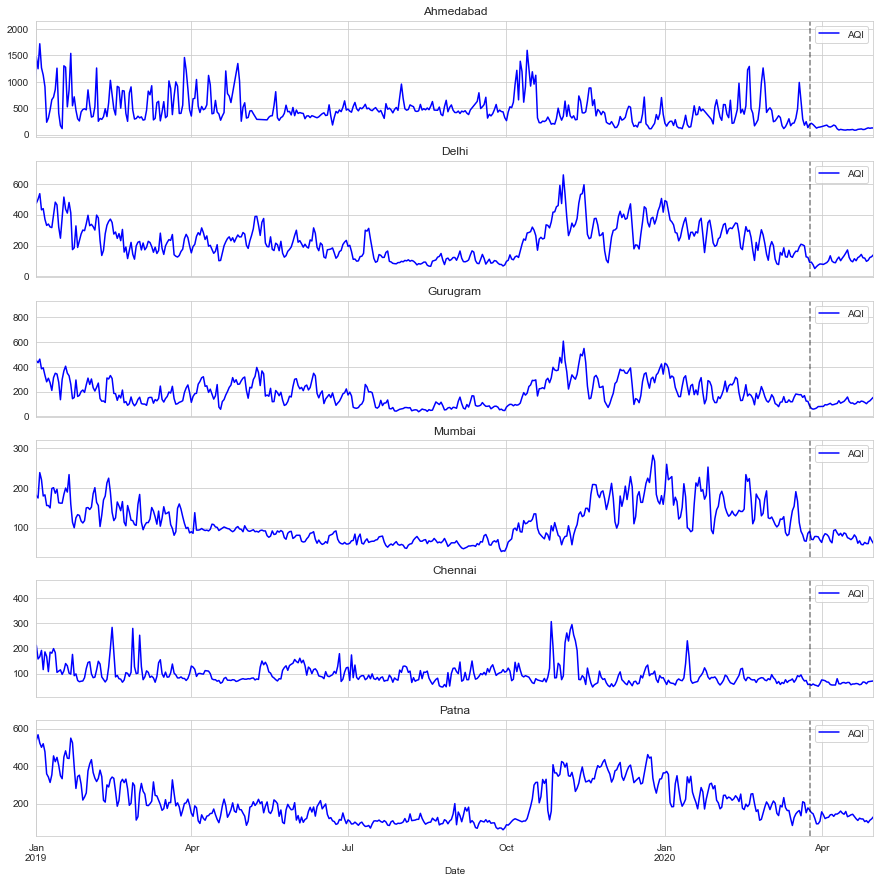

In [24]:
import datetime

subplot_titles=['Ahmedabad', 'Delhi', 'Gurugram', 'Mumbai', 'Chennai', 'Patna']
x_line_annotation = datetime.date(2020, 3, 25)
f, axes = plt.subplots(6, 1, figsize=(15, 15), sharex=True)
for count, title in enumerate(subplot_titles):
    ax = df_city_day[df_city_day['City']==title].plot(x='Date', y='AQI', kind='line', ax=axes[count], color='blue')
    ax.title.set_text(title)
    ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2020, 5, 1)])
    ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.5, color='black')

> * It is interesting to note that the Pollution level in India generally drops down as summer approaches. This can be seen from the above graphs.
> * However, the reduction of pollution level in March 2020 is more as compared to March 2019.

## <a>Clearly, there is a reduction in the Pollution level in India because of the lockdown imposed during this pandemic.So, we can say that it's blessing in disguise</a>